In [63]:
import pandas as pd
from pmaw import PushshiftAPI
import numpy as np
api = PushshiftAPI()

In [3]:
#collect nsfw submissions from askreddit 2019.1.1 - 2019.3.1
#after 2019.3.1 - before 2019.5.1 
#after 2019.5.1 - before 2019.7.1

In [4]:
import datetime as dt
before = int(dt.datetime(2021,3,1,0,0).timestamp())    
after = int(dt.datetime(2020,1,1,0,0).timestamp())

In [134]:
%%time
subreddit=["AskReddit"]
limit=10000
over_18=True
sub = api.search_submissions(subreddit=subreddit, limit=limit, before=before, after=after)
print(f'Retrieved {len(sub)} submissions from Pushshift')
submissions = pd.DataFrame(sub)
submissions.to_csv('first13.csv', header=True, index=False, columns=list(submissions.axes[1]))

Checkpoint:: Success Rate: 92.00% - Requests: 100 - Batches: 10 - Items Remaining: 800
Total:: Success Rate: 92.59% - Requests: 108 - Batches: 11 - Items Remaining: 0
Retrieved 10000 submissions from Pushshift
CPU times: user 3.76 s, sys: 236 ms, total: 4 s
Wall time: 2min 1s


In [2]:
import pandas as pd
import seaborn
import glob
import matplotlib.pyplot as plt

In [9]:
appended_data = []
for infile in glob.glob("/home/aswin/ask_reddit/*.csv"):
    data = pd.read_csv(infile)
    # store DataFrame in list
    appended_data.append(data)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)
# write DataFrame to an excel sheet 
appended_data.to_csv('appended_new.csv')

/home/aswin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/aswin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/aswin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/aswin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (65) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(

In [3]:
reddit_data = pd.read_csv('appended_new.csv')

/home/aswin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,10,11,40,46,61,62,68,70,71,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
reddit_data 

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,...,edited,gilded,treatment_tags,upvote_ratio,suggested_sort,removed_by,updated_utc,link_flair_css_class,og_description,og_title
0,0,[],False,laybot,NaN,[],NaN,text,t2_4j6nr2td,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,vinesonthewayhome,NaN,[],NaN,text,t2_4ezkj5l5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,CMDRWolfe04,NaN,[],NaN,text,t2_2q2e8x5p,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,Commies4Lyfe,NaN,[],NaN,text,t2_4ntmn3s,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,wu-ba-lu-ba,NaN,[],NaN,text,t2_2djezf9s,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,9995,[],False,Godsshoeshine24,NaN,[],NaN,text,t2_9lb4657,False,...,NaN,NaN,NaN,NaN,NaN,NaN,1.569350e+09,NaN,NaN,NaN
119996,9996,[],False,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.569350e+09,NaN,NaN,NaN
119997,9997,[],False,Dabilishous,NaN,[],NaN,text,t2_342p2emx,False,...,NaN,NaN,NaN,NaN,NaN,NaN,1.569350e+09,NaN,NaN,NaN
119998,9998,[],False,HappyGilmore44,NaN,[],NaN,text,t2_few3ko7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,1.569350e+09,NaN,NaN,NaN


In [4]:
reddit_data['spoiler'].nunique()

2

In [13]:
need = reddit_data[['title','created_utc','num_comments']]

In [14]:
need = need.drop_duplicates(subset=['title'],keep='last',inplace=False) 
#well, all oare unique

In [15]:
#converting utc to time that I can understand

def get_date(created):
    return dt.datetime.fromtimestamp(created)


In [16]:
_timestamp = reddit_data["created_utc"].apply(get_date)
reddit_data= reddit_data.assign(timestamp = _timestamp)

In [17]:
#let's see the pattern in number of questions vs days the last two years then!
reddit_data['timestamp'] = pd.to_datetime(reddit_data['timestamp'], format = '%Y-%m-%d %H:%M:%S')
reddit_data['Day'] = reddit_data['timestamp'].dt.day_name()

In [18]:
def eda(dataframe):
    print ("missing values \n", dataframe.isnull().sum())
    print ("dataframe index \n", dataframe.index)
    print ("dataframe types \n", dataframe.dtypes)
    print ("dataframe shape \n", dataframe.shape)
    print ("dataframe describe \n", dataframe.describe())
    for item in dataframe:
        print (item)
        print (dataframe[item].nunique())

In [14]:
eda(need)

missing values 
 title           0
created_utc     0
num_comments    0
dtype: int64
dataframe index 
 Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            119990, 119991, 119992, 119993, 119994, 119995, 119996, 119997,
            119998, 119999],
           dtype='int64', length=117860)
dataframe types 
 title           object
created_utc      int64
num_comments     int64
dtype: object
dataframe shape 
 (117860, 3)
dataframe describe 
         created_utc   num_comments
count  1.178600e+05  117860.000000
mean   1.581532e+09      17.213813
std    1.717295e+07     372.810989
min    1.551459e+09       0.000000
25%    1.567288e+09       2.000000
50%    1.581721e+09       4.000000
75%    1.596098e+09      11.000000
max    1.614490e+09   47132.000000
title
117860
created_utc
108501
num_comments
602


In [15]:
need['Day'].value_counts().plot()
import seaborn
seaborn.countplot(x='Day', data=need)

KeyError: 'Day'

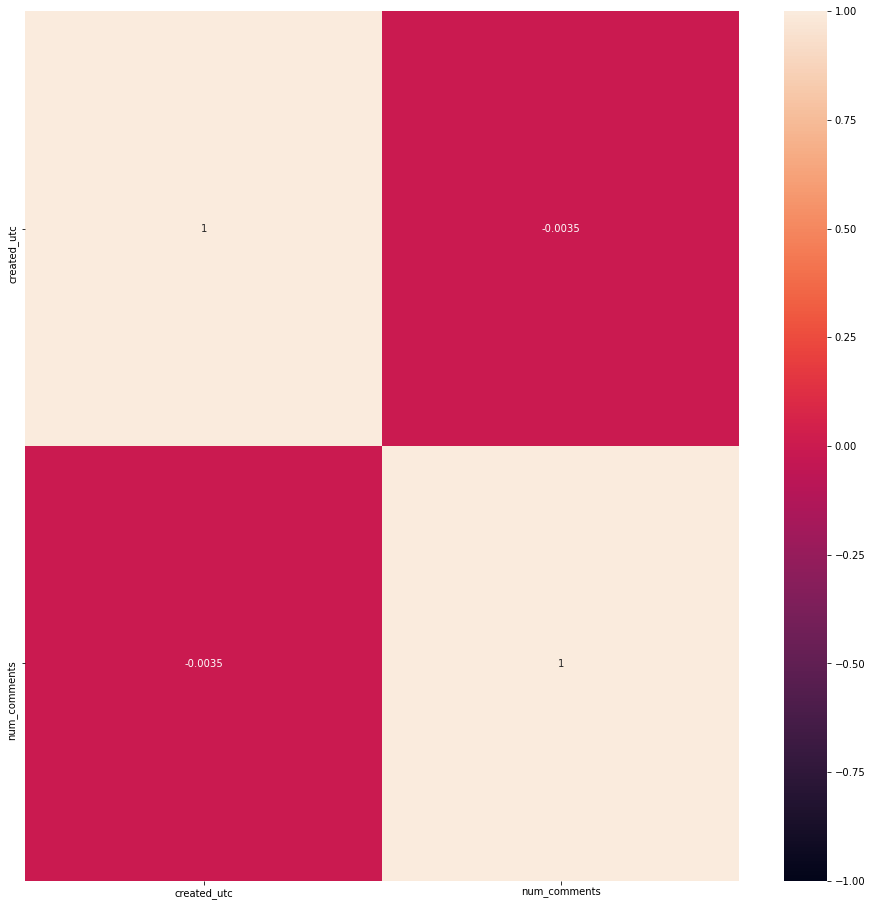

In [16]:
#to find correlations
import numpy as np

reddit_data.dtypes

corr=need.corr()
plt.figure(figsize=(16, 16))

heatmap = seaborn.heatmap(corr, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.


In [19]:
need = reddit_data[['title','created_utc','num_comments','score',]]

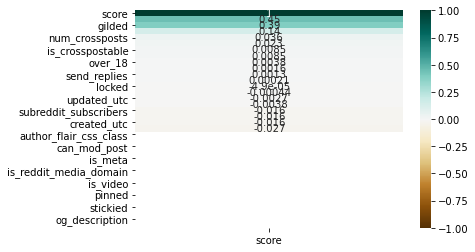

In [20]:
reddit_data.corr()[['score']].sort_values(by='score', ascending=False)

heatmap = seaborn.heatmap(reddit_data.corr()[['score']].sort_values(by='score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


In [21]:
reddit_data = reddit_data.dropna(how='all', axis=1)
A=reddit_data[["stickied","pinned","is_video","is_reddit_media_domain","is_meta"]]

In [22]:
reddit_data[["stickied","pinned","is_video","is_reddit_media_domain","is_meta"]] = reddit_data[["stickied","pinned","is_video","is_reddit_media_domain","is_meta"]].astype(int)


In [23]:
reddit_data = reddit_data.replace({True: 1, False: 0}) 

In [24]:
reddit_data = reddit_data.fillna(0)

In [25]:
df.replace(0,np.nan).dropna(axis=1,how="all")

NameError: name 'df' is not defined

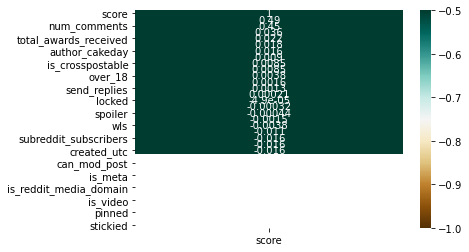

In [26]:
reddit_data.corr()[['score']].sort_values(by='score', ascending=False)

heatmap = seaborn.heatmap(reddit_data.corr()[['score']].sort_values(by='score', ascending=False), vmin=-1, vmax=-0.50, annot=True, cmap='BrBG')


In [27]:
reddit_data.replace(0).dropna(axis=1,how="all")


,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,...,edited,gilded,treatment_tags,upvote_ratio,suggested_sort,removed_by,updated_utc,link_flair_css_class,timestamp,Day
0,0,[],0.0,laybot,[],text,t2_4j6nr2td,0.0,0.0,[],...,0.000000e+00,0.0,0,0.0,0,0,0.000000e+00,0,2020-01-06 23:59:55,Monday
1,1,[],0.0,vinesonthewayhome,[],text,t2_4ezkj5l5,0.0,0.0,[],...,0.000000e+00,0.0,0,0.0,0,0,0.000000e+00,0,2020-01-06 23:59:46,Monday
2,2,[],0.0,CMDRWolfe04,[],text,t2_2q2e8x5p,0.0,0.0,[],...,0.000000e+00,0.0,0,0.0,0,0,0.000000e+00,0,2020-01-06 23:59:35,Monday
3,3,[],0.0,Commies4Lyfe,[],text,t2_4ntmn3s,0.0,0.0,[],...,0.000000e+00,0.0,0,0.0,0,0,0.000000e+00,0,2020-01-06 23:59:25,Monday
4,4,[],0.0,wu-ba-lu-ba,[],text,t2_2djezf9s,0.0,0.0,[],...,0.000000e+00,0.0,0,0.0,0,0,0.000000e+00,0,2020-01-06 23:59:19,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,9995,[],1.0,Godsshoeshine24,[],text,t2_9lb4657,0.0,1.0,[],...,1.568608e+09,1.0,[],1.0,new,moderator,1.569350e+09,mod-post,2019-09-23 20:40:59,Monday
119996,9996,[],1.0,[deleted],[],text,t2_9lb4657,0.0,1.0,[],...,1.568608e+09,1.0,[],1.0,new,moderator,1.569350e+09,mod-post,2019-09-23 20:40:51,Monday
119997,9997,[],1.0,Dabilishous,[],text,t2_342p2emx,0.0,1.0,[],...,1.568608e+09,1.0,[],1.0,new,moderator,1.569350e+09,mod-post,2019-09-23 20:40:48,Monday
119998,9998,[],1.0,HappyGilmore44,[],text,t2_few3ko7,0.0,1.0,[],...,1.568608e+09,1.0,[],1.0,new,moderator,1.569350e+09,mod-post,2019-09-23 20:40:47,Monday


In [28]:
need

,title,created_utc,num_comments,score
0,Can you get flu for only a few hours,1578351595,3,1
1,What’s the best way to keep yourself entertain...,1578351586,15,1
2,You've Just Been Drafted To Fight In WWIII. Yo...,1578351575,9,1
3,How do you think the US/Iran tensions will pla...,1578351565,2,1
4,You wake up as Donald Trump and WW3 has just b...,1578351559,16,1
...,...,...,...,...
119995,Has anyone ever passed a breathalyzer and been...,1569264059,2,1
119996,What’s your view on what happens after death?,1569264051,2,1
119997,What's your favorite book?,1569264048,11,2
119998,"Have you ever lost a pet, seemingly for good, ...",1569264047,4,4


In [29]:
#split timestamp into data and time
reddit_data['new_date'] = [dt.date() for dt in reddit_data['timestamp']]
reddit_data['new_time'] = [dt.time() for dt in reddit_data['timestamp']]


In [30]:
#strip date from time and find the number of unique days in the dataset
reddit_data['Only Date'] = reddit_data['timestamp'].apply(lambda x:x.date().strftime('%m-%d-%y'))

In [31]:
reddit_data['Only Date'].nunique()

548

In [32]:
#since I took 10000 submissions for every 2-3 months, I have 48 unique dates in a subset of 10,000 submissions
check = reddit_data['Only Date'].iloc[10000:20000]

In [33]:
#here is no optimal split percentage.

#You must choose a split percentage that meets your project’s objectives with considerations that include:

    #Computational cost in training the model.
    #Computational cost in evaluating the model.
    #Training set representativeness.
    #Test set representativeness.

#Nevertheless, common split percentages include:
# Train: 80%, Test: 20%
# Train: 67%, Test: 33%
# Train: 50%, Test: 50%


In [34]:
reddit_data['author'].nunique()

84268

In [35]:
reddit_data.columns

Index(['Unnamed: 0', 'all_awardings', 'allow_live_comments', 'author',
       'author_flair_richtext', 'author_flair_type', 'author_fullname',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'removed_by_category', 'retrieved_on', 'score', 'selftext',
       'send_replies', 'spoiler', 'steward_reports', 'stickied', 'subreddit',
       'subreddit_id', 'subreddit_subscribers', 'subreddit_type', 'thumbnail',
       'title', 'total_awards_received', 'url', 'whitelist_status', 'wls

In [36]:
#finding the readability of each title. We determined the readability of each comment using the textstat library,
#which contains a metric that is a conglomerate of a variety of standard readability metrics. Doing so allowed us to reach a readability consensus for a post despite a wide variety of available metrics.
#https://pypi.org/project/textstat/

In [37]:
import textstat
reddit_data['readability'] = [textstat.flesch_reading_ease(text) for text in reddit_data['title']]

In [38]:
#length of the question

In [39]:
reddit_data['length'] = [len(text) for text in reddit_data['title']]

In [40]:
reddit_analysis = reddit_data.to_csv('reddit_analysis.csv')

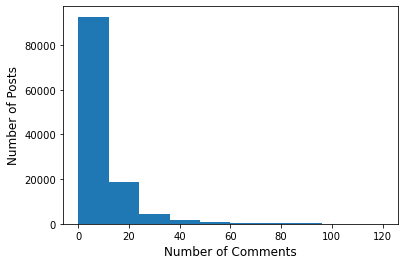

In [41]:
plt.hist(reddit_data['num_comments'],range=(0,120))
plt.xlabel('Number of Comments',fontsize='large')
plt.ylabel('Number of Posts',fontsize='large')
#plt.title('About half are above or below the number of comments!', fontsize='large')
plt.show()

In [43]:
import numpy as np
med_comments = reddit_data['num_comments'].median() 
reddit_data['Above_Below_Median'] = np.where(reddit_data['num_comments']>=med_comments, 'Above', 'Below')

In [44]:
med_dist = reddit_data['Above_Below_Median'].value_counts()/len(reddit_data)
med_dist



Above    0.529625
Below    0.470375
Name: Above_Below_Median, dtype: float64

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["John is a good boy. John watches basketball"]

vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)

print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'john': 4, 'is': 3, 'good': 2, 'boy': 1, 'watches': 5, 'basketball': 0}
(1, 6)
[[1 1 1 1 2 1]]


It changes. On the other hand if you use random_state=some_number, then you can guarantee that the output of Run 1 will be equal to the output of Run 2, i.e. your split will be always the same. It doesn't matter what the actual random_state number is 42, 0, 21

In [42]:
title_dict = dict(reddit_data.title)

In [143]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
top_N = 10    
    
    
txt = reddit_data.title.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

pl.style.use('ggplot')

rslt.plot.bar(rot=0)   

[nltk_data] Downloading package punkt to /home/aswin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/aswin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'reddit_data' is not defined

In [142]:
plt.style.use('ggplot')

rslt.plot.bar(rot=0)

NameError: name 'rslt' is not defined

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('=' * 60)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(20),
                    columns=['Word', 'Frequency']).set_index('Word')

plt.style.use('ggplot')

rslt.plot.bar(rot=0)

In [44]:
reddit_data['Above_Below_Median']

0         Below
1         Above
2         Above
3         Below
4         Above
          ...  
119995    Below
119996    Below
119997    Above
119998    Above
119999    Above
Name: Above_Below_Median, Length: 120000, dtype: object

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split #need to conduct a Train/Test split before creating features
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(reddit_data['title']), reddit_data['Above_Below_Median'])


In [1]:
X = reddit_data['title']
y = reddit_data['Above_Below_Median']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cvec = CountVectorizer(stop_words='english', max_features=100)
tvec = TfidfVectorizer(stop_words='english', max_features=100)

cvecdata = cvec.fit_transform(X_train)
cvec_df  = pd.DataFrame(cvecdata.todense(),
             columns=cvec.get_feature_names())

NameError: name 'reddit_data' is not defined

In [3]:
reddit = pd.read_csv('reddit_analysis.csv')

/home/aswin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10,39,45,60,61,66,68,69,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
reddit

,Unnamed: 0,Unnamed: 0.1,all_awardings,allow_live_comments,author,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,removed_by,updated_utc,link_flair_css_class,timestamp,Day,new_date,new_time,Only Date,readability,length
0,0,0,[],0.0,laybot,[],text,t2_4j6nr2td,0.0,0.0,...,0,0.000000e+00,0,2020-01-06 23:59:55,Monday,2020-01-06,23:59:55,01-06-20,104.64,36
1,1,1,[],0.0,vinesonthewayhome,[],text,t2_4ezkj5l5,0.0,0.0,...,0,0.000000e+00,0,2020-01-06 23:59:46,Monday,2020-01-06,23:59:46,01-06-20,79.60,91
2,2,2,[],0.0,CMDRWolfe04,[],text,t2_2q2e8x5p,0.0,0.0,...,0,0.000000e+00,0,2020-01-06 23:59:35,Monday,2020-01-06,23:59:35,01-06-20,87.72,133
3,3,3,[],0.0,Commies4Lyfe,[],text,t2_4ntmn3s,0.0,0.0,...,0,0.000000e+00,0,2020-01-06 23:59:25,Monday,2020-01-06,23:59:25,01-06-20,95.17,52
4,4,4,[],0.0,wu-ba-lu-ba,[],text,t2_2djezf9s,0.0,0.0,...,0,0.000000e+00,0,2020-01-06 23:59:19,Monday,2020-01-06,23:59:19,01-06-20,95.67,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,119995,9995,[],0.0,Godsshoeshine24,[],text,t2_9lb4657,0.0,0.0,...,0,1.569350e+09,0,2019-09-23 20:40:59,Monday,2019-09-23,20:40:59,09-23-19,58.28,79
119996,119996,9996,[],0.0,[deleted],0,0,0,0.0,0.0,...,0,1.569350e+09,0,2019-09-23 20:40:51,Monday,2019-09-23,20:40:51,09-23-19,88.74,45
119997,119997,9997,[],0.0,Dabilishous,[],text,t2_342p2emx,0.0,0.0,...,0,1.569350e+09,0,2019-09-23 20:40:48,Monday,2019-09-23,20:40:48,09-23-19,92.80,26
119998,119998,9998,[],0.0,HappyGilmore44,[],text,t2_few3ko7,0.0,0.0,...,0,1.569350e+09,0,2019-09-23 20:40:47,Monday,2019-09-23,20:40:47,09-23-19,77.23,114


In [5]:
def removeSymbols(df, column):
    data = df.copy()
    data.loc[:, column] = data[column].str.replace('/r/', '', regex=True)
    data.loc[:, column] = data[column].str.replace('[^\.\'A-Za-z0-9]+', ' ', regex=True)
    return data

In [6]:
removeSymbols(reddit, 'title')

,Unnamed: 0,Unnamed: 0.1,all_awardings,allow_live_comments,author,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,removed_by,updated_utc,link_flair_css_class,timestamp,Day,new_date,new_time,Only Date,readability,length
0,0,0,[],0.0,laybot,[],text,t2_4j6nr2td,0.0,0.0,...,0,0.000000e+00,0,2020-01-06 23:59:55,Monday,2020-01-06,23:59:55,01-06-20,104.64,36
1,1,1,[],0.0,vinesonthewayhome,[],text,t2_4ezkj5l5,0.0,0.0,...,0,0.000000e+00,0,2020-01-06 23:59:46,Monday,2020-01-06,23:59:46,01-06-20,79.60,91
2,2,2,[],0.0,CMDRWolfe04,[],text,t2_2q2e8x5p,0.0,0.0,...,0,0.000000e+00,0,2020-01-06 23:59:35,Monday,2020-01-06,23:59:35,01-06-20,87.72,133
3,3,3,[],0.0,Commies4Lyfe,[],text,t2_4ntmn3s,0.0,0.0,...,0,0.000000e+00,0,2020-01-06 23:59:25,Monday,2020-01-06,23:59:25,01-06-20,95.17,52
4,4,4,[],0.0,wu-ba-lu-ba,[],text,t2_2djezf9s,0.0,0.0,...,0,0.000000e+00,0,2020-01-06 23:59:19,Monday,2020-01-06,23:59:19,01-06-20,95.67,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,119995,9995,[],0.0,Godsshoeshine24,[],text,t2_9lb4657,0.0,0.0,...,0,1.569350e+09,0,2019-09-23 20:40:59,Monday,2019-09-23,20:40:59,09-23-19,58.28,79
119996,119996,9996,[],0.0,[deleted],0,0,0,0.0,0.0,...,0,1.569350e+09,0,2019-09-23 20:40:51,Monday,2019-09-23,20:40:51,09-23-19,88.74,45
119997,119997,9997,[],0.0,Dabilishous,[],text,t2_342p2emx,0.0,0.0,...,0,1.569350e+09,0,2019-09-23 20:40:48,Monday,2019-09-23,20:40:48,09-23-19,92.80,26
119998,119998,9998,[],0.0,HappyGilmore44,[],text,t2_few3ko7,0.0,0.0,...,0,1.569350e+09,0,2019-09-23 20:40:47,Monday,2019-09-23,20:40:47,09-23-19,77.23,114


In [27]:
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
#pd.set_option('display.width', 500)
#pd.set_option('display.max_columns', 100)
#pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("poster")
import re


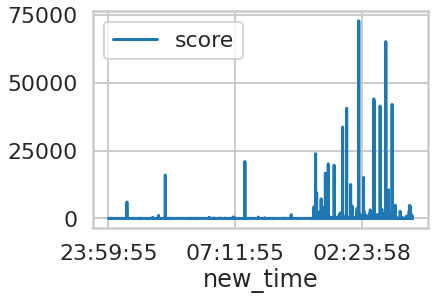

In [28]:
import matplotlib.pyplot as plt
reddit.plot(x="new_time", y=["score"])
plt.show()


In [13]:
def word_count(text):
    wordList = re.sub("[^\w]", " ",  text).split()
    return len(wordList)

reddit['word_count'] = reddit['title'].map(lambda x : word_count(x))

In [14]:
reddit['word_count']

0          9
1         18
2         28
3         11
4         19
          ..
119995    13
119996     9
119997     5
119998    23
119999     9
Name: word_count, Length: 120000, dtype: int64

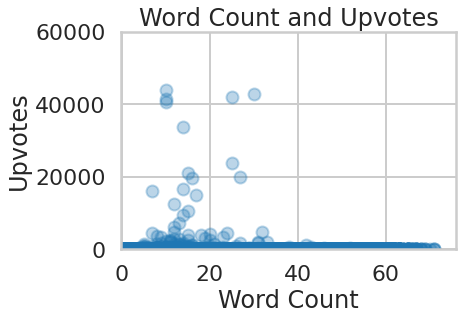

In [29]:
plt.scatter(reddit['word_count'], reddit['score'], alpha=0.3);
plt.title('Word Count and Upvotes');
plt.xlabel('Word Count');
plt.ylabel('Upvotes');
plt.xlim(-0.1,76);
plt.ylim(0,60000,1000);
#plt.grid(False)

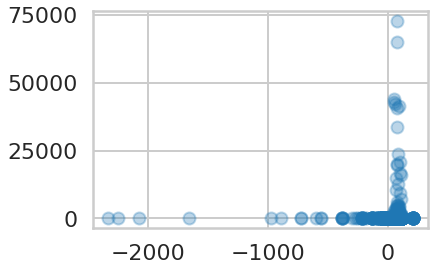

In [39]:

plt.scatter(reddit['readability'], reddit['score'], alpha=0.3);



In [40]:
reddit.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'all_awardings', 'allow_live_comments', 'author', 'author_flair_richtext', 'author_flair_type', 'author_fullname', 'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post', 'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id', 'is_crosspostable', 'is_meta', 'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video', 'link_flair_background_color', 'link_flair_richtext', 'link_flair_text_color',
       'link_flair_type', 'locked', 'media_only', 'no_follow', 'num_comments', 'num_crossposts', 'over_18', 'parent_whitelist_status', 'permalink', 'pinned', 'pwls', 'removed_by_category', 'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler', 'steward_reports', 'stickied', 'subreddit', 'subreddit_id', 'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'title', 'total_awards_received', 'url', 'whitelist_status', 'wls', 'link_flair_template_id', 'link_flair_text', 'author_cakeday',
  

In [98]:
reddit_features = reddit[['title','num_comments','Day','upvote_ratio','over_18','length','readability','send_replies','word_count']]

In [99]:
reddit_features

,title,num_comments,Day,upvote_ratio,over_18,length,readability,send_replies,word_count
0,Can you get flu for only a few hours,3,Monday,0.0,0,36,104.64,1,9
1,What’s the best way to keep yourself entertain...,15,Monday,0.0,0,91,79.60,1,18
2,You've Just Been Drafted To Fight In WWIII. Yo...,9,Monday,0.0,0,133,87.72,1,28
3,How do you think the US/Iran tensions will pla...,2,Monday,0.0,0,52,95.17,1,11
4,You wake up as Donald Trump and WW3 has just b...,16,Monday,0.0,0,92,95.67,1,19
...,...,...,...,...,...,...,...,...,...
119995,Has anyone ever passed a breathalyzer and been...,2,Monday,0.0,0,79,58.28,1,13
119996,What’s your view on what happens after death?,2,Monday,0.0,0,45,88.74,1,9
119997,What's your favorite book?,11,Monday,0.0,0,26,92.80,1,5
119998,"Have you ever lost a pet, seemingly for good, ...",4,Monday,0.0,0,114,77.23,1,23


In [101]:
reddit_features['Day']= reddit['Day'].replace({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday' : 3, 'Friday': 4, 'Saturday': 5, 'Sunday' : 6}) 

<ipython-input-101-59e5ddbacf98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_features['Day']= reddit['Day'].replace({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday' : 3, 'Friday': 4, 'Saturday': 5, 'Sunday' : 6})


creating Baseline

In [102]:
reddit_features

,title,num_comments,Day,upvote_ratio,over_18,length,readability,send_replies,word_count
0,Can you get flu for only a few hours,3,0,0.0,0,36,104.64,1,9
1,What’s the best way to keep yourself entertain...,15,0,0.0,0,91,79.60,1,18
2,You've Just Been Drafted To Fight In WWIII. Yo...,9,0,0.0,0,133,87.72,1,28
3,How do you think the US/Iran tensions will pla...,2,0,0.0,0,52,95.17,1,11
4,You wake up as Donald Trump and WW3 has just b...,16,0,0.0,0,92,95.67,1,19
...,...,...,...,...,...,...,...,...,...
119995,Has anyone ever passed a breathalyzer and been...,2,0,0.0,0,79,58.28,1,13
119996,What’s your view on what happens after death?,2,0,0.0,0,45,88.74,1,9
119997,What's your favorite book?,11,0,0.0,0,26,92.80,1,5
119998,"Have you ever lost a pet, seemingly for good, ...",4,0,0.0,0,114,77.23,1,23


In [103]:
reddit_features.to_pickle("reddit.pkl")

In [104]:
import pickle


df = pickle.load(open('reddit.pkl', 'rb'))

In [105]:
df_org = df.sample(n=5000)

In [106]:
df_sample = df_org.copy()



In [111]:
reddit_sample = reddit.sample(n=5000)


In [133]:
reddit_features = reddit_sample[['num_comments','Day','upvote_ratio','over_18','length','readability','send_replies','word_count']]

In [121]:
y=reddit_sample['score'].values


In [141]:
reddit_features

,num_comments,Day,upvote_ratio,over_18,length,readability,send_replies,word_count
7854,1,Monday,0.0,0,107,54.22,1,17
23637,14,Saturday,0.0,0,37,81.29,1,7
99244,3,Thursday,0.0,0,88,87.05,1,18
35898,12,Friday,1.0,0,41,105.66,1,9
24086,1,Sunday,0.0,0,63,68.77,1,11
...,...,...,...,...,...,...,...,...
71375,0,Thursday,1.0,0,132,85.18,1,24
51447,13,Monday,0.0,0,93,86.03,1,20
95436,1,Friday,0.0,1,109,93.48,1,22
70770,2,Friday,1.0,0,122,76.72,1,23


In [144]:
reddit_features['Day']= reddit['Day'].replace({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday' : 3, 'Friday': 4, 'Saturday': 5, 'Sunday' : 6})

<ipython-input-144-61e3bd28ddc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_features['Day']= reddit['Day'].replace({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday' : 3, 'Friday': 4, 'Saturday': 5, 'Sunday' : 6})


In [145]:
x=reddit_features.values

In [146]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [147]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings

In [148]:

def model_diagnostics(model, pr=True):
    """
    Returns and prints the R-squared, RMSE and the MAE
    for a trained model
    """
    y_predicted = model.predict(X_test)
    r2 = r2_score(y_test, y_predicted)
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    if pr:
        print(f"R-Sq: {r2:.4}")
        print(f"RMSE: {np.sqrt(mse)}")
        print(f"MAE: {mae}")
    
    return [r2,np.sqrt(mse),mae]

In [149]:
model_performance_dict = dict()

In [150]:

%%time
baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train,y_train)
model_performance_dict["Baseline"] = model_diagnostics(baseline)

R-Sq: -0.09607
RMSE: 26.24376966538916
MAE: 10.031865000000002
CPU times: user 3.65 ms, sys: 4.2 ms, total: 7.85 ms
Wall time: 5.31 ms


In [151]:
linear = LinearRegression()
linear.fit(X_train,y_train)
model_performance_dict["Linear Regression"] = model_diagnostics(linear)

R-Sq: -146.0
RMSE: 303.94007701007047
MAE: 21.76092086882244
